<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_167/blob/main/Reto%20Entrega%202%20-%20Clasificaci%C3%B3n%20Ensambles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto-> Entrega 2 (18/11) -> Clasificación Ensambles**

**Integrantes:** 

Genaro Rodriguez Vazquez A01150931

Javier Rodríguez Rudas A01793817

**Materia:** Ciencia y analítica de Datos

**Profesor:** Dr. Jobish Vallikavungal Devassia  

**Fecha:** 18 Noviembre 2022






# **Reto #2 -> Clasificación-ensambles y presentación ejecutiva.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mplcursors import cursor 
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_percentage_error

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
import math as math


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score
import seaborn as sns
from matplotlib import rcParams

#import geopandas as gpd
#from  geopandas import GeoDataFrame
from shapely.geometry import Point
from sklearn import preprocessing, cluster

scaler = StandardScaler()
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_reto2 = pd.read_csv('/content/sample_data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', 
                    index_col=None ,encoding='utf-8',encoding_errors='ignore')
df_reto2.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


**Limpieza de base de datos**

1. Buscamos la proporción de la variable objetivo semáforo

In [ ]:
df_reto2["SEMAFORO"].value_counts()/len(df_reto2)

Verde       0.406367
Rojo        0.362360
Amarillo    0.231273
Name: SEMAFORO, dtype: float64

2. Eliminamos el signo < de todas las variables ordinales

In [ ]:
to_numeric=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in to_numeric:
  df_reto2[i] = df_reto2[i].astype("str")
  df_reto2[i] = df_reto2[i].str.replace("<","0")
  df_reto2[i]= df_reto2[i].astype("float")

3. Verificamos los datos vacíos que tiene nuestro dataframe

In [ ]:
df_reto2.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

4. Ubicamos los diferentes valores que cada columna contiene. 
Luego tratamos los datos nulos por columna y agregamos el nombre de la columna con las listas "fill_moda" o "fill_mediana".

In [ ]:
fill_moda = ["CALIDAD_ALC","CALIDAD_SDT_ra","CALIDAD_SDT_salin","CALIDAD_N_NO3","CALIDAD_DUR","CONTAMINANTES","CALIDAD_CONDUC"]
fill_mediana = ["CONDUCT_mS/cm","ALC_mg/L","SDT_M_mg/L","N_NO3_mg/L","DUR_mg/L"]
dropna = ["SDT_mg/L"]

In [ ]:
for c in fill_moda:
  df_reto2[c].fillna(df_reto2[c].mode()[0], inplace=True)

In [ ]:
for c in fill_mediana:
  df_reto2[c].fillna(df_reto2[c].median(), inplace=True)

In [ ]:
len(df_reto2)

1068

5. Como se puede apreciar la columna SDT_mg/L se encuentra vacía en su totalidad, por lo cual se procederá a eliminarla

Usamos el método drop para eliminar la columna con valores vacíos

In [ ]:
df_reto2.drop("SDT_mg/L",axis=1,inplace=True)

6. Nos aseguramos que no haya valores nulos

In [ ]:
df_reto2.isnull().sum().sort_values(ascending=False)

CLAVE                   0
SITIO                   0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
CR_TOT_mg/L             0
CALIDAD_CD              0
CD_TOT_mg/L             0
CALIDAD_CONDUC          0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO     

7. Como sabemos muchos modelos no toman en cuenta strings como entrada, es por esto que podemos encodificar estas variables con 0 y 1 mediante el metodo get_dummies() para convertir variables categoricas en dummy variables.

In [ ]:
df_reto2["CONTAMINANTES"].value_counts()

FLUO,                                            512
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
AS,                                               31
                                                ... 
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,                1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 126, dtype: int64

In [ ]:
df_tmp = df_reto2["CONTAMINANTES"].str.get_dummies(sep=',')
clean_dfreto2 = pd.concat([df_reto2,df_tmp], axis=1)
clean_dfreto2.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


8. Eliminamos la columna contaminantes, ya que la hemos convertido en columnas dummy

In [ ]:
clean_dfreto2.drop("CONTAMINANTES",axis=1,inplace=True)

In [ ]:
df_h2o_s = clean_dfreto2.copy()

In [ ]:
df_h2o_s.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


9. Seleccionamos los atributos independientes con los que vamos a trabajar

In [ ]:
columns=["SITIO","ORGANISMO_DE_CUENCA","ESTADO","MUNICIPIO","ACUIFERO","SUBTIPO","LONGITUD","LATITUD","CUMPLE_CON_ALC"	,
         "CUMPLE_CON_COND",	"CUMPLE_CON_SDT_ra"	,"CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO","CUMPLE_CON_DUR","CUMPLE_CON_CF","CUMPLE_CON_NO3",	
         "CUMPLE_CON_AS"	,"CUMPLE_CON_CD","CUMPLE_CON_CR",	"CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN","CUMPLE_CON_FE","ALC","AS","CD","CF",
         "CONDUC",	"CR"	,"DT","FE","FLUO","HG","MN","NI","NO3","PB","SDT_ra","SDT_salin","SEMAFORO"]

10. Creamos nuestro nuevo dataframe con las columnas deseadas

In [ ]:
df_h2o_s=df_h2o_s[columns]

**Selecciona tus variables independientes X y dependiente Y (semáforo)**

1. Seleccionamos unas variable predictoras y objetivos

In [ ]:
X=df_h2o_s.iloc[:,:-1:] #variables predictoras
y=df_h2o_s.iloc[:,-1] #variable objetivo

2. Creamos nuestro pipeline, usaremos en este caso variables categóricas y binarias, dado que son los 2 tipos de variables presentes en el dataset a utilizar para generar el modelo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

#Usaremos onehotencoder para transformar las variables categóricas y las columnas que son binarias, pero quedaron expresadas con si y no.

categorical_features =["SITIO","ORGANISMO_DE_CUENCA"	,"ESTADO",	"MUNICIPIO","ACUIFERO",	"SUBTIPO"]
categorical_pipeline=Pipeline(
    steps=[("OHEcat",OneHotEncoder(handle_unknown="ignore"))]
)

binary_features=["CUMPLE_CON_ALC"	,
         "CUMPLE_CON_COND",	"CUMPLE_CON_SDT_ra"	,"CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO","CUMPLE_CON_DUR","CUMPLE_CON_CF","CUMPLE_CON_NO3",	
         "CUMPLE_CON_AS"	,"CUMPLE_CON_CD","CUMPLE_CON_CR",	"CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN","CUMPLE_CON_FE"]
binary_pipeline=Pipeline(
    steps=[("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)       

columnasTransformer = ColumnTransformer(transformers = [('catpipe', categorical_pipeline, categorical_features),
                                                        ('binpipe', binary_pipeline, binary_features)])

**Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder() #creamos el labelencoder
le.fit(y) #entrenamos nuestra salida
y_label=le.transform(y) #transformamos la salida

**Realiza un análisis general de las features importances a traves de decision trees o random forest.**

1. Para efectos de nuestro equipo seleccionamos el Decision Tree

In [ ]:
#importamos el módulo tree que cuenta con el decision tree classifier
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier()
pipeline = Pipeline(steps=[('ct',columnasTransformer),('dt',decision_tree)])
pipeline.fit(X,y_label)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('catpipe',
                                                  Pipeline(steps=[('OHEcat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SITIO',
                                                   'ORGANISMO_DE_CUENCA',
                                                   'ESTADO', 'MUNICIPIO',
                                                   'ACUIFERO', 'SUBTIPO']),
                                                 ('binpipe',
                                                  Pipeline(steps=[('OHEbi',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CUMPLE_CON_ALC',
                                                   'CUMPLE_CON_COND',
                                                   'CUMPLE_

Feature: SITIO               , Score: 0.00094
Feature: ORGANISMO_DE_CUENCA , Score: 0.00122
Feature: ESTADO              , Score: 0.00000
Feature: MUNICIPIO           , Score: 0.00000
Feature: ACUIFERO            , Score: 0.00253
Feature: SUBTIPO             , Score: 0.00000
Feature: LONGITUD            , Score: 0.00000
Feature: LATITUD             , Score: 0.00000
Feature: CUMPLE_CON_ALC      , Score: 0.02903
Feature: CUMPLE_CON_COND     , Score: 0.05974
Feature: CUMPLE_CON_SDT_ra   , Score: 0.00000
Feature: CUMPLE_CON_SDT_salin, Score: 0.00000
Feature: CUMPLE_CON_FLUO     , Score: 0.20103
Feature: CUMPLE_CON_DUR      , Score: 0.14288
Feature: CUMPLE_CON_CF       , Score: 0.08155
Feature: CUMPLE_CON_NO3      , Score: 0.10459
Feature: CUMPLE_CON_AS       , Score: 0.11910
Feature: CUMPLE_CON_CD       , Score: 0.00103
Feature: CUMPLE_CON_CR       , Score: 0.01957
Feature: CUMPLE_CON_HG       , Score: 0.00000
Feature: CUMPLE_CON_PB       , Score: 0.01170
Feature: CUMPLE_CON_MN       , Sco

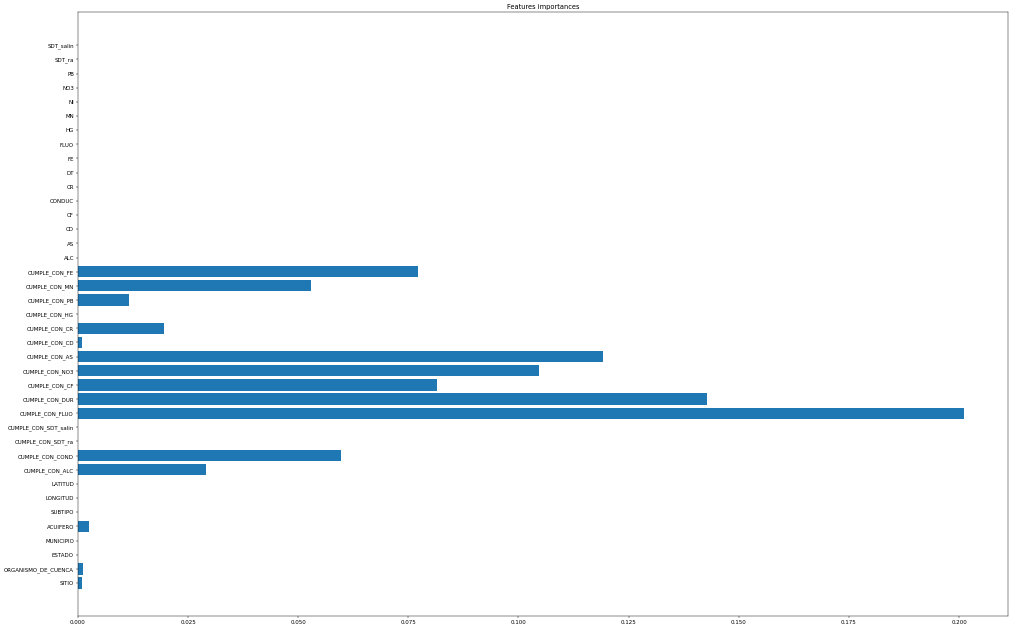

In [ ]:
#Importamos el módulo para obtener las features más importantes, por medio de permutation importance

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Usamos la función permutation importance
importance = permutation_importance(pipeline, X, y_label, n_repeats=10,random_state=1)

figure(figsize = (30, 20), dpi = 40)

#Le pasamos el promedio de la importancia de la feature, seguido del nombre de la feature
for v,n in zip(importance['importances_mean'], list(X.columns)):
	print('Feature: {0:20}, Score: {1:.5f}'.format(n,v))

#Graficamos el resultado
plt.title("Features importances")
plt.barh(X.columns.to_numpy(),importance["importances_mean"])
plt.show()

**Selecciona las variables de mayor importancia.**

1. Tal como se puede observar, las columnas que hablan de si el agua cumple o no con algún indicador, serán las más importantes al momento de generar nuestro modelo, es por eso que serán nuestras variables de mayor importancia.

In [ ]:
most_important=["CUMPLE_CON_FE","CUMPLE_CON_MN","CUMPLE_CON_PB","CUMPLE_CON_CR","CUMPLE_CON_AS","CUMPLE_CON_NO3",
                "CUMPLE_CON_CF","CUMPLE_CON_DUR","CUMPLE_CON_FLUO","CUMPLE_CON_COND","CUMPLE_CON_ALC"]
df_h2o_s=df_h2o_s[most_important]

2. Creamos otro pipeline con las variables más importantes

In [ ]:
binary_features=["CUMPLE_CON_FE","CUMPLE_CON_MN","CUMPLE_CON_PB","CUMPLE_CON_CR","CUMPLE_CON_AS","CUMPLE_CON_NO3",
                "CUMPLE_CON_CF","CUMPLE_CON_DUR","CUMPLE_CON_FLUO","CUMPLE_CON_COND","CUMPLE_CON_ALC"]
bin_pipe=Pipeline(
    steps=[("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)  

important_features = ColumnTransformer(transformers = [('binpipe', bin_pipe, binary_features)])

3. Asignamos a X las columnas más importantes, sacadas con feature importance, la y ya la tenemos en la parte de arriba, guardada dentro de la variable y_label.

In [ ]:
X=df_h2o_s

In [ ]:
X.head()

,CUMPLE_CON_FE,CUMPLE_CON_MN,CUMPLE_CON_PB,CUMPLE_CON_CR,CUMPLE_CON_AS,CUMPLE_CON_NO3,CUMPLE_CON_CF,CUMPLE_CON_DUR,CUMPLE_CON_FLUO,CUMPLE_CON_COND,CUMPLE_CON_ALC
0,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI
3,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI


**Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)**

1. Usaremos el 30% de los datos para prueba y el resto para entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y_label,test_size=0.3,random_state=1,stratify=y_label)

**Creamos una función donde guardamos los modelos de Decision Tree y Random Forest**

1. Creamos una función donde guardamos los modelos de Decision Tree y Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def get_models(): #creamos una función donde guardamos el modelo
  modelos = list()
  nombres = list()

  # RF - Bosque Aleatorio
  modelos.append(RandomForestClassifier(random_state=0,max_depth=5))

  #DT - Decision Tree
  modelos.append(DecisionTreeClassifier(random_state=0,max_depth=5))

  return modelos

2. Guardamos dentro de la variable modelos, nuestros modelos creados con get_models()

In [ ]:
modelos=get_models()

3. Evaluamos nuestro modelo con Random Forest

In [ ]:
pipeline_rf = Pipeline(steps=[('ct',important_features),('m',modelos[0])])
pipeline_rf.fit(X_train,y_train)
yhat_rf=pipeline_rf.predict(X_test)

4. Obtenemos las métricas de accuracy, precision y recall del modelo

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

accuracy=accuracy_score(y_test,yhat_rf)
precision=precision_score(y_test, yhat_rf, average='macro')
recall=recall_score(y_test,yhat_rf,average="macro")
print("El accuracy es de:",accuracy)
print("La precision es de:",precision)
print("El recall es de:",recall)

El accuracy es de: 0.9345794392523364
La precision es de: 0.9295508274231677
El recall es de: 0.925305734795074


5. Evaluamos nuestro modelo con Decision Tree

In [ ]:
pipeline_dt = Pipeline(steps=[('ct',important_features),('m',modelos[1])])
pipeline_dt.fit(X_train,y_train)
yhat_dt=pipeline_dt.predict(X_test)

6. Obtenemos las métricas de accuracy, precision y recall del modelo

In [ ]:
accuracy=accuracy_score(y_test,yhat_dt)
precision=precision_score(y_test, yhat_dt, average='macro')
recall=recall_score(y_test,yhat_dt,average="macro")
print("El accuracy es de:",accuracy)
print("La precision es de:",precision)
print("El recall es de:",recall)

El accuracy es de: 0.8660436137071651
La precision es de: 0.8824217787632422
El recall es de: 0.8470798384591488


7. Visualizamos el Decision Tree

[Text(0.6071428571428571, 0.9166666666666666, 'X[17] <= 0.5\ngini = 0.65\nsamples = 747\nvalue = [173, 271, 303]'),
 Text(0.5357142857142857, 0.75, 'X[15] <= 0.5\ngini = 0.626\nsamples = 613\nvalue = [173, 137, 303]'),
 Text(0.35714285714285715, 0.5833333333333334, 'X[0] <= 0.5\ngini = 0.514\nsamples = 466\nvalue = [65, 98, 303]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[8] <= 0.5\ngini = 0.42\nsamples = 413\nvalue = [31, 79, 303]'),
 Text(0.14285714285714285, 0.25, 'X[11] <= 0.5\ngini = 0.359\nsamples = 386\nvalue = [31, 52, 303]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.286\nsamples = 362\nvalue = [31, 28, 303]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.5, 0.4166666666666667, 'X[8] <= 0.5\ngini = 0.46\nsamples = 53\nvalue = [34, 19, 0]'),
 Text(0.42857142857142855, 0.25, 'X[6] <= 0.5\ngini = 0.386\nsamples = 46\

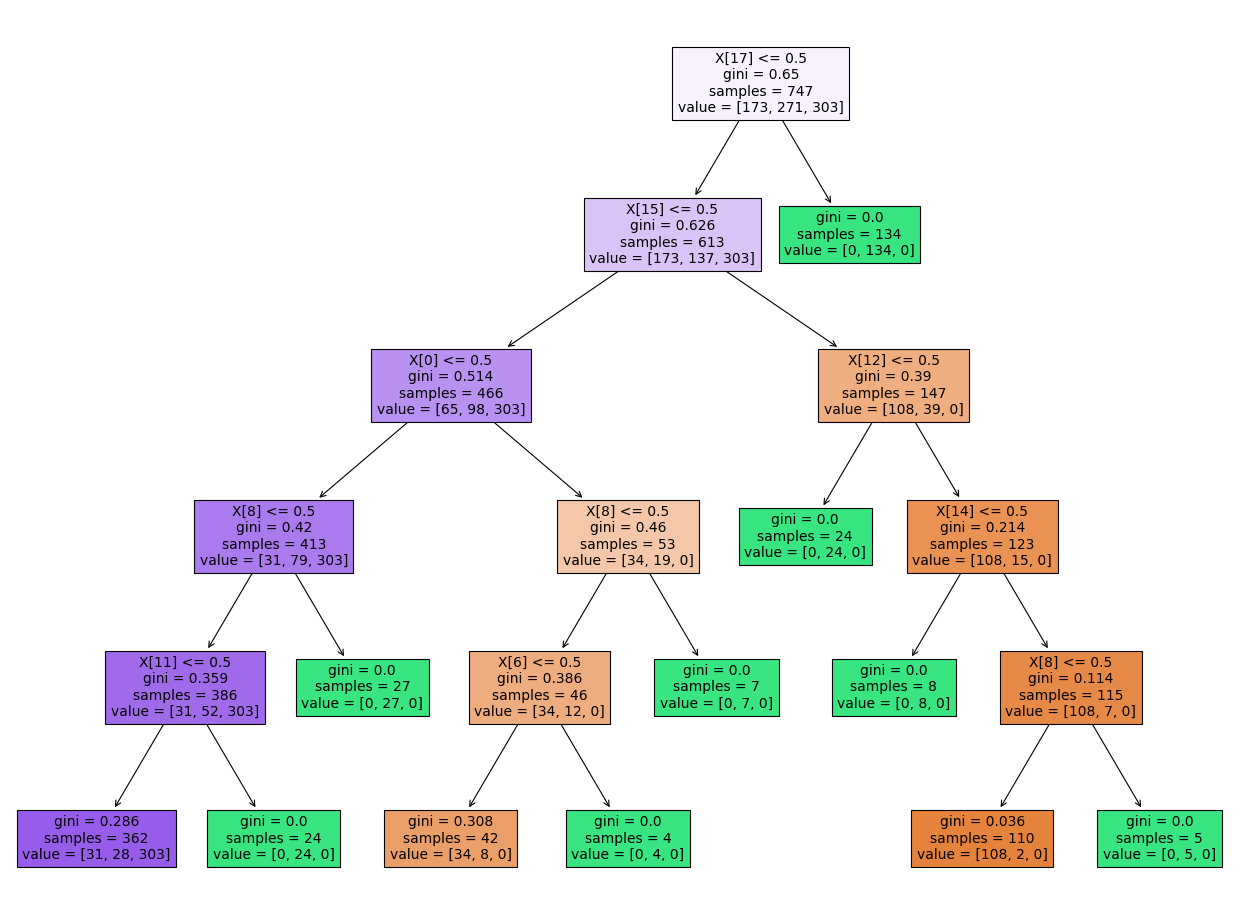

In [ ]:
figure(figsize = (20, 15), dpi = 80)

tree.plot_tree(pipeline_dt.named_steps["m"], filled = True)

**Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.**

1. Primero generamos el reporte de clasificación del Decision Tree para ello utilizamos el módulo classification report de Scikit-learn.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, yhat_dt, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.76      0.80        74
     class 1       1.00      0.78      0.88       116
     class 2       0.80      1.00      0.89       131

    accuracy                           0.87       321
   macro avg       0.88      0.85      0.86       321
weighted avg       0.88      0.87      0.86       321



2. El resultado del accuracy en este modelo es de 0.86

Ahora hacemos el reporte de clasificación del Random Forest



In [ ]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, yhat_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.88      0.87        74
     class 1       1.00      0.91      0.95       116
     class 2       0.92      0.99      0.96       131

    accuracy                           0.93       321
   macro avg       0.93      0.93      0.93       321
weighted avg       0.94      0.93      0.93       321



3. El score de accuracy es de 0.93, para el modelo de Random Forest, lo que indica un mejor performance en comparación al modelo del Decision Tree.

Graficamos la Curva Precision-Recall del Decision Tree

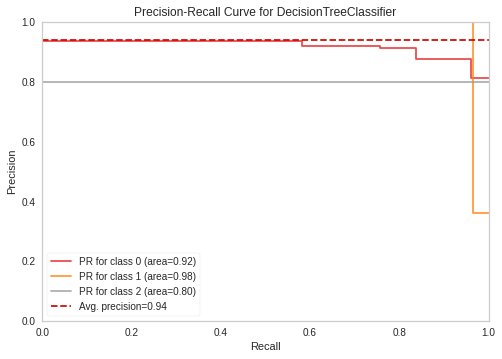

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
prcurve = PrecisionRecallCurve(
    pipeline_dt,
    per_class=True,
    cmap="Set1"
)
prcurve.fit(X_train, y_train)
prcurve.score(X_test, y_test)
prcurve.show()

4. Obtenemos que el promedio de la precision es de 0.93 para el modelo de Decision Tree

Ahora sacamos la Curva Precision-Recall del modelo con Random Forest

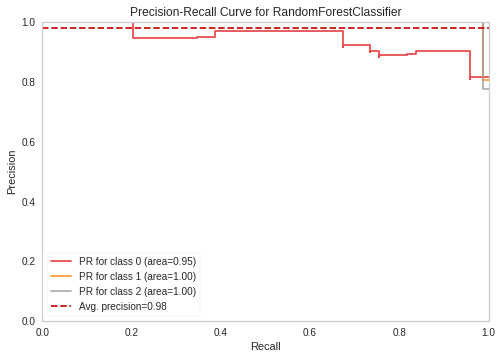

In [ ]:
prcurve = PrecisionRecallCurve(
    pipeline_rf,
    per_class=True,
    cmap="Set1"
)
prcurve.fit(X_train, y_train)
prcurve.score(X_test, y_test)
prcurve.show()

5. El promedio de la métrica precision es de 0.98 para el modelo con Decision Tree

**Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

def mi_cm(yreal, ypred,title):
  cm=confusion_matrix(yreal, ypred)

  plt.figure(figsize=(6,4))
  plt.title("Matriz de Confusión "+title)
  ax = sns.heatmap(cm, annot=True, fmt='', cmap="viridis", cbar=True)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

1. Ahora usamos esa función para obtener la matriz de confusión para Decision Tree

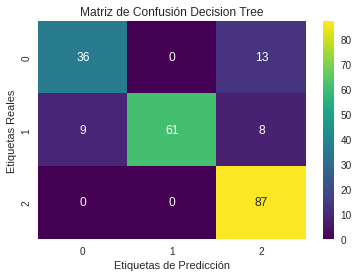

In [ ]:
mi_cm(y_test,yhat_dt,"Decision Tree")

2. Hacemos uso de la misma función para obtener la matriz de confusión para Random Forest

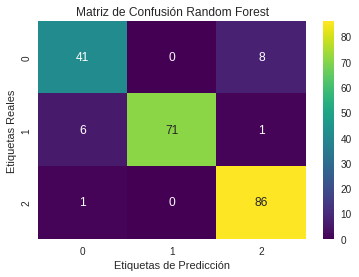

In [ ]:
mi_cm(y_test,yhat_rf,"Random Forest")

# **Conclusiones**

Al realizar este ejercicio podemos concluir lo siguiente:

*	Lo importante que es realizar el análisis de los datos antes de empezar a decir que modelo vamos a implementar.

* La relevancia que tiene la fase de preproducción y limpieza de los datos en un análisis de los datos.

* En la realización del reto dos quedo afirmado que el modelo K-means no es el adecuado para clasificar la calidad del, por lo cual el método del codo no nos será de utilidad para identificar clusters.

* Nos percatamos hay un 40% de mantos subterráneos con semáforo verde, mientras que en el color rojo se encuentra el 36% y el resto en color amarillo.

* Los atributos que más aportan valor al modelo son las relacionas a que si el agua cumple o no con algún indicador, ya que indican calidad de agua.

*	El clasificador más óptimo será el de Random Forest, dado que en todos los scores de diferentes métricas como "accuracy", "recall" y "precision" muestra mejores resultados en comparación al modelo del Decision Tree, también lo confirma la Curva Precision-Recall, con una media de 0.98 en la precision del modelo con Random Forest en comparación al 0.93 del Decision Tree, no sólo eso sino que además la matriz de confusión muestra que el modelo con Random Forest clasifica mejor los Verdaderos Positivos, Falsos Positivos, Falsos Negativos y Verdaderos Negativos.
